In [1505]:
%matplotlib inline

import os
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import datetime
import numpy
from pandas.plotting import table 

In [1483]:
basic_colors = [
    'b',
'g',
'r',
'c',
'm',
'y',
'k',
'w'
]
colors = [
    'black',
    'rosybrown',
    'brown',
    'red',
    'orangered',
    'lightsalmon',
    'peru',
    'gold',
    'olive',
    'lawngreen',
    'darkgreen',
    'turquoise',
    'teal',
    'slategrey',
    'royalblue',
    'indigo',
    'purple',
    'deeppink'
]

In [1484]:
def getFormattedDfFromTimeSeries(path):
    df = pd.read_csv(path)
    df = df.drop('Lat', 1).drop('Long', 1).drop('Province/State',1)
    df = df.groupby('Country/Region').sum().sort_values(by=getDT(today), ascending=False).T
    if 'Cruise Ship' in df.columns:
        df = df.drop('Cruise Ship', 1)
    return df, pd.read_csv(path).drop('Lat', 1).drop('Long', 1)

In [1485]:
careBeds = pd.read_csv("~/Downloads/CareBeds.csv") 
# https://link.springer.com/article/10.1007/s00134-012-2627-8/tables/2

In [1486]:
population = pd.read_csv('~/Downloads/PopulationByCountry.csv')
population['Population'] = population['Population'].str.replace(",","").astype(int)
population.loc[population['Name'] == 'United States','Name'] = 'US'
# population.loc[population['Name'] == 'United Kingdom','Name'] = 'UK'

In [1529]:
def get_all_data():
    basepath = '../csse_covid_19_data/csse_covid_19_daily_reports/'
    files = filter(lambda x: 'csv' in x, os.listdir(basepath))
    dfs = map(lambda x: pd.read_csv(os.path.join(basepath, x)), files)
    dfs = list(dfs)
    df = pd.concat(dfs, sort=False)
    old_new_cols = {
        'Province/State': 'Province_State',
        'Country/Region': 'Country_Region',
        'Last Update': 'Last_Update',
    }
    for old_col, new_col in old_new_cols.items():
        df[new_col] = df[new_col].fillna(df[old_col])
        df = df.drop(old_col, 1)
    cols_to_drop = ['Lat', 'Long_', 'Latitude', 'Longitude', 'FIPS', 'Admin2', 'Combined_Key']
    for col in cols_to_drop:
        df = df.drop(col, 1)
    df['Last_Update'] = pd.to_datetime(df['Last_Update'])
    df = df.set_index('Last_Update')
    for col in ['Confirmed', 'Deaths', 'Recovered']:
        df[col] = df[col].fillna(0)
    df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
    df['Province_State'] = df['Province_State'].fillna("All")
    return df.sort_index()

In [1532]:
all_data = get_all_data()

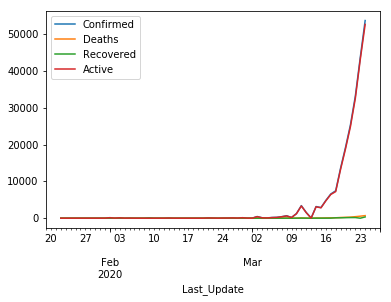

In [1560]:
all_italy_data = all_data[all_data['Country_Region'] == 'Italy']
grouped_data = all_us_data.drop('Province_State', 1).drop('Country_Region', 1).reset_index().resample('D', on='Last_Update').sum()
grouped_data.plot()


In [1556]:
all_us_data

,Confirmed,Deaths,Recovered,Province_State,Country_Region,Active
Last_Update,,,,,,
2020-01-22 17:00:00,1.0,0.0,0.0,Washington,US,1.0
2020-01-23 17:00:00,1.0,0.0,0.0,Washington,US,1.0
2020-01-24 17:00:00,1.0,0.0,0.0,Washington,US,1.0
2020-01-24 17:00:00,1.0,0.0,0.0,Chicago,US,1.0
2020-01-25 17:00:00,1.0,0.0,0.0,Illinois,US,1.0
2020-01-25 17:00:00,1.0,0.0,0.0,Washington,US,1.0
2020-01-26 16:00:00,2.0,0.0,0.0,California,US,2.0
2020-01-26 16:00:00,1.0,0.0,0.0,Arizona,US,1.0
2020-01-26 16:00:00,1.0,0.0,0.0,Illinois,US,1.0


In [1542]:
df_confirmed

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,...,Grenada,Somalia,Belize,Syria,Mozambique,Eritrea,Papua New Guinea,Chad,Laos,Libya
1/22/20,548,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,643,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,920,0,2,0,0,0,2,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,1406,0,2,0,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,2075,0,5,0,0,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1/27/20,2877,0,5,0,1,0,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1/28/20,5509,0,5,0,4,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1/29/20,6087,0,5,0,4,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1/30/20,8141,0,5,0,4,0,5,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1/31/20,9802,2,7,0,5,0,5,11,0,2,...,0,0,0,0,0,0,0,0,0,0


In [1500]:
df_confirmed, df_confirmed_all = getFormattedDfFromTimeSeries('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_dead, df_dead_all = getFormattedDfFromTimeSeries('../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered, df_recovered_all = getFormattedDfFromTimeSeries('../csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [1502]:
df_active = df_confirmed.copy()
for col in df_confirmed.columns:
    df_active[col] = df_confirmed[col] - df_dead[col] - df_recovered[col]
df_active_all = df_confirmed_all.copy()
for col in df_confirmed_all.drop('Province/State', 1).drop('Country/Region',1).columns:
    df_active_all[col] = df_confirmed_all[col] - df_dead_all[col] - df_recovered_all[col]

KeyError: 'Diamond Princess'

In [1489]:
def getDT(dt):
    if isinstance(dt, str):
        return dt
    return dt.strftime("%-m/%-d/%y")
def toDT(dt):
    return datetime.datetime.strptime(dt, "%m/%d/%y")
startdatetime = "1/22/20" # datetime.datetime(year=2020, month=1, day=22)
today = df_confirmed.index[-1]

In [1490]:
mapping = {
    'Iran (Islamic Republic of)': 'Iran',
    'Korea, South': 'South Korea',
    'Russian Federation': 'Russia',
    'occupied Palestinian territory': 'Palestine',
    'Republic of Moldova': 'Moldova',
    'Macao SAR': 'Macau',
    'Hong Kong SAR': 'Hong Kong',
    'Saint Martin': 'St. Martin',
    'Taipei and environs': 'Taiwan',
    'Holy See': 'Vatican City',
    'Viet Nam': 'Vietnam',
}

#Mainland China

for countryName, oldCountryName in mapping.items():
    if oldCountryName in df_confirmed.columns and countryName in df_confirmed.columns:
        df_confirmed[countryName] += df_confirmed[oldCountryName]
        df_confirmed = df_confirmed.drop(oldCountryName, 1)
        
        df_death[countryName] += df_death[oldCountryName]
        df_death = df_death.drop(oldCountryName, 1)
        
        df_recovered[countryName] += df_recovered[oldCountryName]
        df_recovered = df_recovered.drop(oldCountryName, 1)
    
    if oldCountryName in population['Name'].values:
        population.loc[population['Name']==oldCountryName,'Name'] = countryName

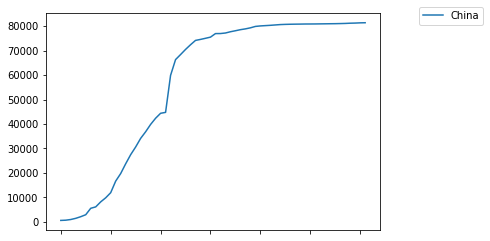

In [1491]:
china = df_confirmed['China']
ax = china.plot()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [1494]:
df_confirmed

Country/Region,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,...,East Timor,Cape Verde,Guernsey,Republic of the Congo,The Gambia,Puerto Rico,Greenland,The Bahamas,Guam,Jersey
1/22/20,548.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,643.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,920.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,1406.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,2075.0,0.0,5.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,2877.0,0.0,5.0,0.0,1.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,5509.0,0.0,5.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,6087.0,0.0,5.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,8141.0,0.0,5.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,9802.0,2.0,7.0,0.0,5.0,0.0,5.0,11.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


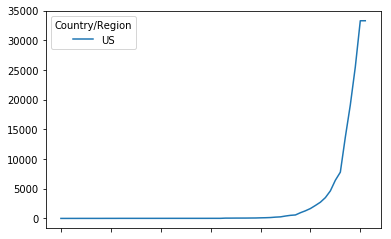

In [1492]:
US = df_confirmed[['US']]
US.plot()

In [1493]:
def generateAndPlotPrediction(x, y):
    f = lambda t,a,b: a * numpy.exp(b*t)
    popt, _ = curve_fit(f,  x,  y, p0=(4, 0.1))
    y_estimate = f(x, *popt)
    return lambda t: popt[0] * numpy.exp(popt[1] * t)
def generateAndPlotPredictionEstimates(x, y):
    f = lambda t,a,b: a * numpy.exp(b*t)
    popt, _ = curve_fit(f,  x,  y, p0=(4, 0.1))
    y_estimate = f(x, *popt)
    return popt

In [1475]:
def addToAx(df, ax, dataFor, moredays=0, withFit=True, fromCaseNum=0, color='b'):
    df_from_case_num = df[df > fromCaseNum]
    x = np.linspace(1, len(df_from_case_num), len(df_from_case_num))
    y = df_from_case_num.values
    f = generateAndPlotPrediction(x, y)
    x2 = np.linspace(1, len(df_from_case_num) + moredays, len(df_from_case_num) + moredays)
    ax.plot(x, y, color + '-', label='data for {}'.format(dataFor))
    if withFit:
        ax.plot(x2, np.ceil(f(x2)), color + '--', label='fit for {}'.format(dataFor))
def plotCountries(df, start, end, savefilename='', moredays=0, logy=False, titlePH='confirmed', withFit=True, fromCaseNum=0):
    fig = plt.figure()
    ax = plt.subplot(111)
    for i, countryName in enumerate(df.T[start:end].T.columns):
        if countryName == 'Others':
            continue
        addToAx(df[countryName], ax, countryName, moredays=moredays, withFit=withFit, fromCaseNum=fromCaseNum, color=basic_colors[i])
    if moredays > 0:
        plt.title('number of {} infected (COVID-19) -- from day 0 of infection in country with {} cases -- {} day prediction'.format(titlePH, fromCaseNum, moredays))
    else:
        plt.title('number of {} infected (COVID-19) -- from day 0 of infection in country with {} cases'.format(titlePH, fromCaseNum))

    if logy:
        ax.set_yscale('log')
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    if savefilename:
        plt.savefig(savefilename, bbox_extra_artists=(lgd,), bbox_inches='tight')
def plotState(df, stateName, savefig='', moredays=0, withFit=True, fromCaseNum=0, logy=False):
    stateDf = df[
        df['Province/State'].str.contains(stateName)
    ].set_index('Province/State').T.sum(axis=1).T
    fig = plt.figure()
    ax = plt.subplot(111)
    addToAx(
        stateDf, 
        ax,
        stateName,
        moredays=moredays, 
        withFit=withFit, 
        fromCaseNum=fromCaseNum, 
        color=basic_colors[1]
    )
    if logy:
        ax.set_yscale('log')
    plt.title("{} Infected Num".format(stateName))
    plt.tight_layout()
    if savefig != '':
        plt.savefig(savefig, bbox_inches='tight')
def plotCountryDelta(df, countryName, nDaysRolling=3, logy=False, savefilename=None):
    df = df[[countryName]]
    df.loc[:,'delta'] = df[countryName].diff()
    df['secondDiv'] = df['delta'].diff()
    df['derivIncreaseDecrease'] = df['delta'] / df['delta'].shift()
    df = df.iloc[2:]
    fig, ax = plt.subplots()
    to_plot = df
    to_plot.index = map(toDT, to_plot.index)
    to_plot[[countryName]].plot(ax=ax)
    to_plot.delta.rolling(nDaysRolling).mean().iloc[nDaysRolling:].plot(ax=ax)
    to_plot.secondDiv.rolling(nDaysRolling).mean().iloc[nDaysRolling:].plot(ax=ax)
    to_plot.derivIncreaseDecrease.plot(ax=ax, secondary_y=True, style='r--')
    if logy:
        ax.set_yscale('log')
        
    # Shrink current axis by 30%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])

    ax.set_ylabel('Number')
    ax.right_ax.set_ylabel('Increasing Or Decreasing Deriv')

    # Put a legend to the right of the current axis
    lines = ax.get_lines() + ax.right_ax.get_lines()
    lgd = ax.legend(lines, [l.get_label() for l in lines], loc='center left', bbox_to_anchor=(1.15, 0.5))
    plt.title('Plotting Change For ' + countryName)
    plt.tight_layout()
    if savefilename:
        plt.savefig(savefilename, bbox_extra_artists=(lgd,), bbox_inches='tight')
        


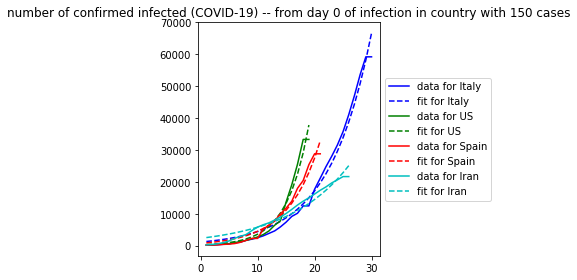

In [1451]:
plotCountries(df_confirmed.T.iloc[[1, 2, 3, 5]].T, 0, 4, 
              'Italy.Germany.US.png',
              moredays=0, 
              logy=False, 
              fromCaseNum=150)

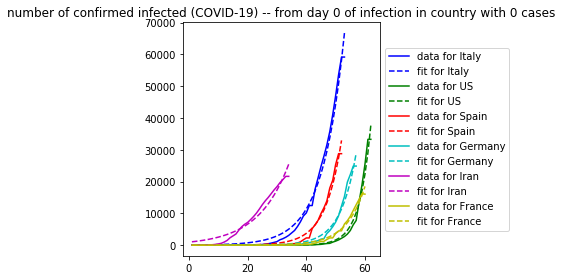

In [1452]:
plotCountries(df_confirmed, 1,7, logy=False, fromCaseNum=0)

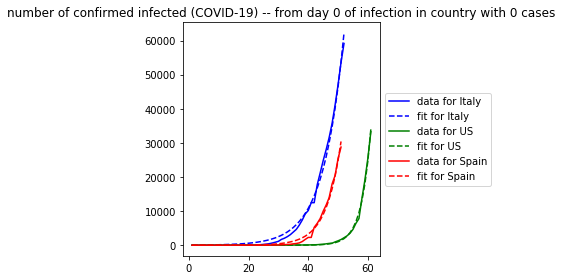

In [1332]:
plotCountries(df_confirmed, 1,4, 'SK.Iran.Italy.png',moredays=0)

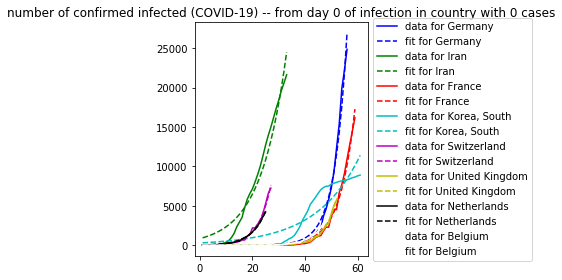

In [1333]:
plotCountries(df_confirmed, 4,len(basic_colors) + 4, '4.11.png', moredays=0)

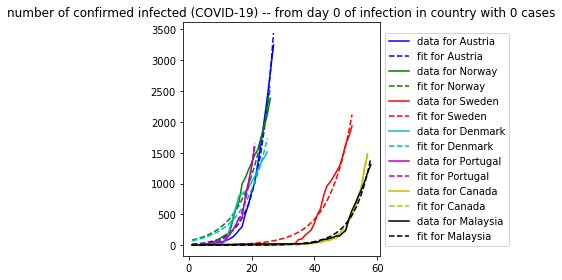

In [1334]:
plotCountries(df_confirmed, len(basic_colors) + 4, 2*len(basic_colors) + 3, '12.18.png', moredays=0)

In [1464]:
US_all_confirmed = df_confirmed_all[df_confirmed_all['Country/Region'] == 'US']
US_all_confirmed = US_all_confirmed.drop('Country/Region', 1)

US_all_dead = df_dead_all[df_confirmed_all['Country/Region'] == 'US']
US_all_dead = US_all_dead.drop('Country/Region', 1)

US_all_active = df_active_all[df_confirmed_all['Country/Region'] == 'US']
US_all_active = US_all_active.drop('Country/Region', 1)

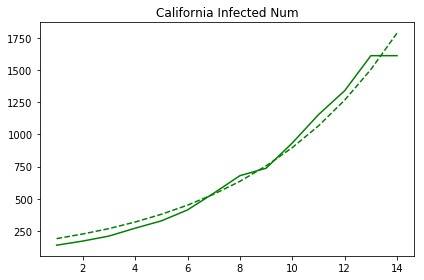

In [1465]:
plotState(US_all_active, stateName='California', savefig='CA.png')

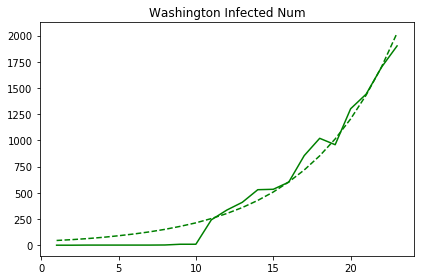

In [1337]:
plotState(US_all_active, 'Washington', 'WA.png')

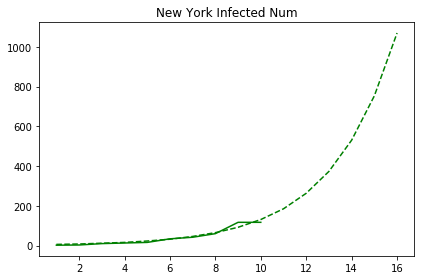

In [1474]:
plotState(US_all_dead.iloc[:-3], 'New York','NY.png',logy=False, moredays=6)

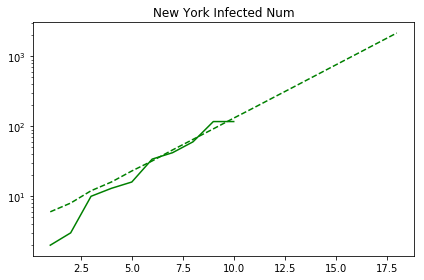

In [1480]:
plotState(US_all_dead.T.iloc[:-30], 'New York','NY.dead.png',logy=True, moredays=8)

In [1340]:
dfByPop = pd.merge(df_active.iloc[-1:].T.reset_index().rename(columns={'Country/Region':'Name'}), population, on='Name')
dfByPop = dfByPop.rename(columns={getDT(today):'InfectedNum'})
# dfByPop['Population'] = dfByPop['Population'].str.replace(",","").astype(int)
dfByPop['1 in X'] = (dfByPop['Population'] / dfByPop['InfectedNum']).replace([np.inf, -np.inf], np.nan).dropna(how="all").astype(int)
dfByPop['% Have It'] = (100 * dfByPop['InfectedNum'] / dfByPop['Population']).round(4)

success
              Name  InfectedNum  1 in X
0      Switzerland         7016    1233
1            Italy        46638    1296
2            Spain        24421    1914
3           Norway         2375    2282
4          Austria         3219    2797
5          Germany        24513    3417
6          Belgium         3063    3783
7          Denmark         1500    3861
8      Netherlands         4034    4247
9           France        13296    4909
10          Sweden         1897    5323
11        Portugal         1581    6449
12          Israel         1033    8379
13    Korea, South         5884    8713
14         Finland          615    9009
15              US        32855   10074
16  United Kingdom         5392   12590
17          Greece          590   17666
18       Singapore          309   18933
19       Australia         1219   20918
20         Ecuador          772   22853
21          Canada         1434   26319
22        Malaysia         1157   27974
23         Lebanon          236 

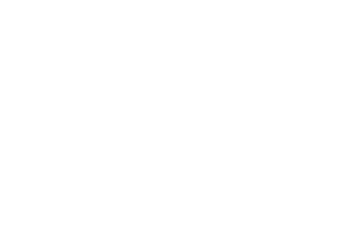

In [1341]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

tableToPlot = dfByPop[dfByPop['Population'] > 5000000].sort_values(by='1 in X').reset_index()[['Name', 'InfectedNum', '1 in X']]

tableToPlot[:25].to_html('table.tmp.html')
title = """<h3>Active Cases By Country, 1 In X people currently have it</h3>"""
with open('table.tmp.html', 'r') as f:
    with open('table.html', 'w') as f2:
        f2.write(title + "\n")
        f2.write(f.read())
import subprocess
output = subprocess.call(
    'wkhtmltoimage -f png --width 0 table.html table.activebycountry.1inx.wkh.png', shell=True)

if output != 0:
    print("Try installing wkhtmltoimage/pdf: brew cask install wkhtmltopdf")
else:
    subprocess.call('rm *.html', shell=True)
    print("success")
    print(tableToPlot[:25])

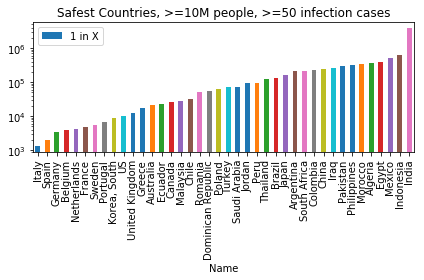

In [1342]:
toPlot = dfByPop[dfByPop['Population'] >= 10e6]
toPlot = toPlot[toPlot['InfectedNum'] >= 100]
toPlot = toPlot.sort_values(by='1 in X')
toPlot[['Name', '1 in X']].plot.bar(x='Name', y='1 in X',logy=True)
plt.title('Safest Countries, >=10M people, >=50 infection cases')
plt.tight_layout()
# plt.savefig('safestCountries.1inx.png', bbox_inches='tight')

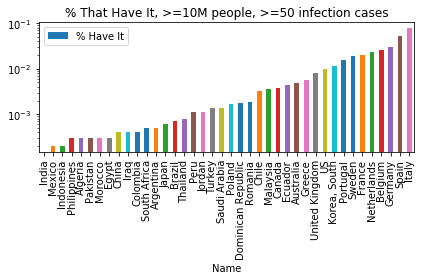

In [1343]:
toPlot = dfByPop[dfByPop['Population'] >= 10e6]
toPlot = toPlot[toPlot['InfectedNum'] >= 100]
toPlot = toPlot.sort_values(by='% Have It')
toPlot[['Name', '% Have It']].plot.bar(x='Name', y='% Have It',logy=True)
plt.title('% That Have It, >=10M people, >=50 infection cases')
plt.tight_layout()
# plt.savefig('safestCountries.percenthaveit.png', bbox_inches='tight')

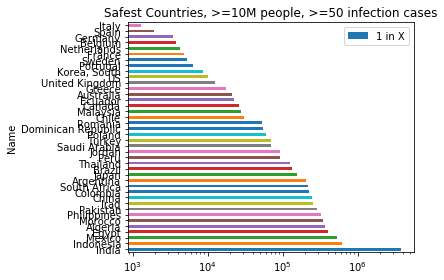

In [1344]:
toPlot = dfByPop[dfByPop['Population'] >= 10e6]
toPlot = toPlot[toPlot['InfectedNum'] >= 100]
toPlot = toPlot.sort_values(by='1 in X')
toPlot[['Name', '1 in X']].iloc[::-1].plot(kind='barh', x='Name', y='1 in X', logx=True)
ax.invert_xaxis()
plt.title('Safest Countries, >=10M people, >=50 infection cases')
plt.tight_layout()
# plt.savefig('safestCountries.2.png')

In [1345]:
notChina = df_confirmed.drop('China', 1)
notChina = pd.DataFrame(data=notChina.sum(axis=1).values, columns=['NumInfected'], index=notChina.index)
notChina['delta'] = notChina.diff(axis=0)
notChina = notChina.iloc[1:]
notChina['secondDiv'] = notChina['delta'] / notChina['delta'].shift()
notChina = notChina.iloc[1:]

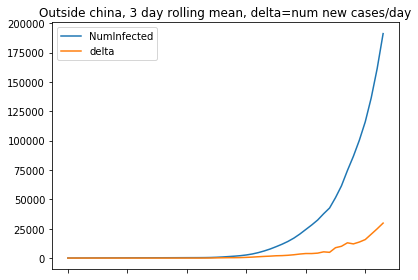

In [1346]:
notChina[['NumInfected','delta']].rolling(3).mean().iloc[4:-1].plot()
plt.title("Outside china, 3 day rolling mean, delta=num new cases/day")
plt.tight_layout()
plt.savefig("outsidechina.firstderiv.png")

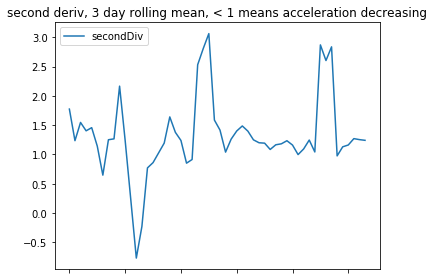

In [1348]:
notChina[['secondDiv']].rolling(3).mean().iloc[4:-1].plot()
plt.title("second deriv, 3 day rolling mean, < 1 means acceleration decreasing")
plt.tight_layout()
# plt.savefig("outsidechina.secondderiv.png")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


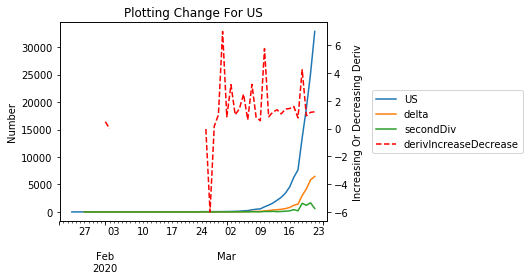

In [1415]:
plotCountryDelta(df_active, 'US')

In [1216]:
def predictForwardFromOthers(df, currentVal, inHowManyDays):
    avgT = 0
    avgC = 0
    for countryName in df.iloc[-1:][df.iloc[-1:] > currentVal].dropna(1).columns:
        if 'China' in countryName:
            continue
        previousValue = sum(df[countryName] > currentVal) + 1
        dfIncluding = df[countryName][-previousValue:]
        if (previousValue - 1) < inHowManyDays:
            continue
        previous, nextVal = dfIncluding.iloc[0], dfIncluding.iloc[inHowManyDays]
        avgT += (1 - (currentVal - previous)/currentVal) * (nextVal - currentVal)
        avgC += 1
    return avgT/avgC + currentVal, avgC

In [1311]:
predictForwardFromOthers(df_dead, 75, 8) # new york numbe rof cases

(456.36, 4)

In [1218]:
predictForwardFromOthers(df_confirmed, 328, 4)

(767.5867729831144, 26)

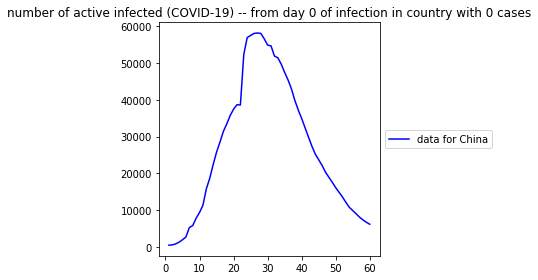

In [1219]:
plotCountries(df_active, 0, 1, titlePH='active',withFit=False, savefilename='activeCasesChina.png')

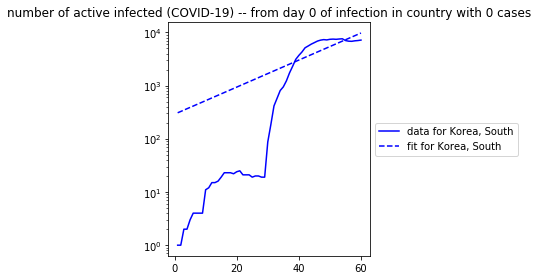

In [1220]:
plotCountries(df_active, 7, 8, titlePH='active',withFit=True, logy=True, savefilename='us_active_logy.png')

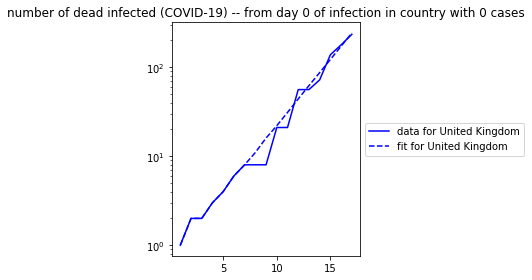

In [1221]:
plotCountries(df_dead, 6, 7, titlePH='dead',withFit=True, logy=True, savefilename='us_dead_logy.png')

In [1222]:
def plotStackedLine(df, title, numberOfCountries, savefigName=''):
    percentActiveDf =  df.div(df.sum(1), axis=0)
    plottingDf = percentActiveDf.T.sort_values(by=df_active.index[-1],ascending=False).iloc[:numberOfCountries].T
    plottingDf['Other'] = 1 - plottingDf.sum(axis=1)
    plottingDf.index = list(map(toDT, plottingDf.index))

    ax = plottingDf.plot.area()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    
    plt.title(title)

    if savefigName:
        plt.savefig(savefigName, bbox_extra_artists=(lgd,), bbox_inches='tight')

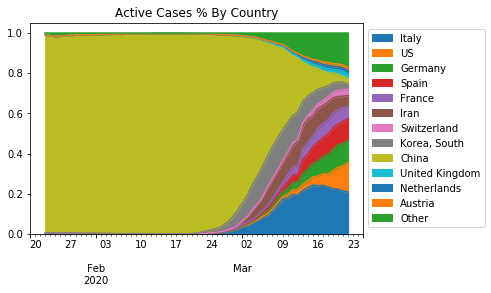

In [1416]:
plotStackedLine(df_active, 'Active Cases % By Country', 12, 'stackedarea.active.all.png')

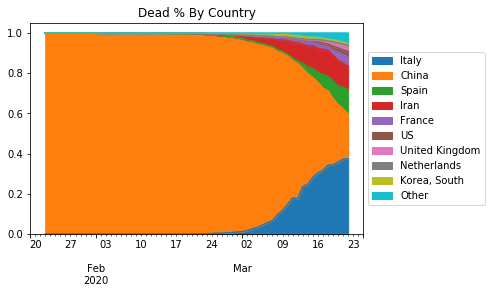

In [1417]:
plotStackedLine(df_dead, 'Dead % By Country', 9, 'stackedarea.dead.all.png')

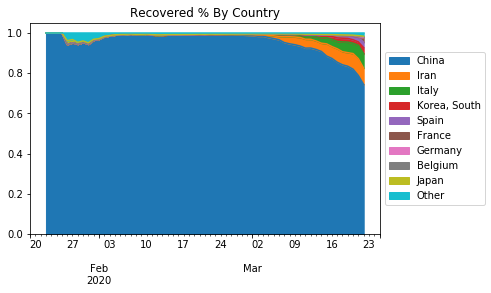

In [1418]:
plotStackedLine(df_recovered, 'Recovered % By Country', 9, 'stackedarea.recovered.all.png')

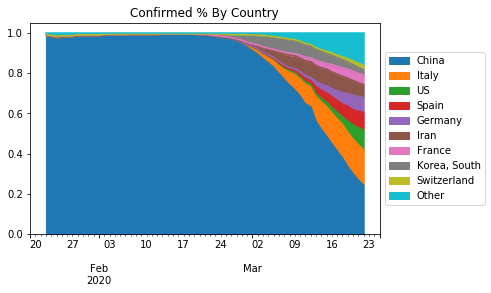

In [1419]:
plotStackedLine(df_confirmed, 'Confirmed % By Country', 9, 'stackedarea.recovered.all.png')

In [1420]:
italy = df_dead[['Italy']].rename(columns={'Italy':'Cum Num Dead'})
italy['new_dead'] = italy['Cum Num Dead'] - italy['Cum Num Dead'].shift(1)
italy['dead_per_minute'] = (24 * 60) / italy['new_dead']
italy = italy.iloc[1:].replace(np.inf, 0)

There is one death per 132.7188940092166 seconds in the Italy right now


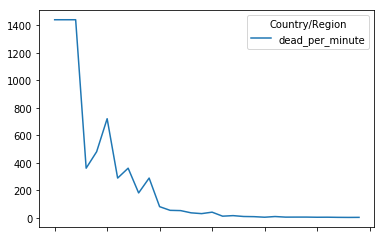

In [1425]:
print("There is one death per {} seconds in the Italy right now".format(italy['dead_per_minute'].iloc[-1] * 60))
italy[['dead_per_minute']][italy['dead_per_minute']!=0].plot()

In [1426]:
lastTwoDaysDeaths = df_dead.sum(axis=1).iloc[-2:]
secondsPerDeaths = int((24*60*60)/(lastTwoDaysDeaths.iloc[-1] - lastTwoDaysDeaths.iloc[0]))
print("There is one death per {} seconds in the world right now".format(secondsPerDeaths))

There is one death per 52 seconds in the world right now


In [1427]:
def combineCountry(df_dead, df_confirmed, df_active, df_recovered, countryName):
    if df_dead is not None:
        df_dead = df_dead[[countryName]].rename(columns={countryName:countryName + " Dead"})
    if df_confirmed is not None:
        df_confirmed = df_confirmed[[countryName]].rename(columns={countryName:countryName + " Confirmed"})
    if df_active is not None:
        df_active = df_active[[countryName]].rename(columns={countryName:countryName + " Active"})
    if df_recovered is not None:
        df_recovered = df_recovered[[countryName]].rename(columns={countryName:countryName + " Recovered"})    
    
    dfs = list(filter(lambda x: x is not None, [df_dead, df_confirmed, df_active, df_recovered]))
    if len(dfs) == 0:
        return None
    df = dfs[0]
    for df2 in dfs[1:]:
        df = df.join(df2)
    return df

In [1428]:
def plotCountriesTotal(df_dead, df_confirmed, df_active, df_recovered, countryNames):
    fig = plt.figure()
    ax = plt.subplot(111)
    for countryName in countryNames:
        df = combineCountry(df_dead, df_confirmed, df_active, df_recovered, countryName)
        df.index = list(map(toDT, df.index))
        df.plot(ax=ax)
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.title(" - ".join(countryNames))
    plt.savefig(".".join(countryNames) + ".all.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

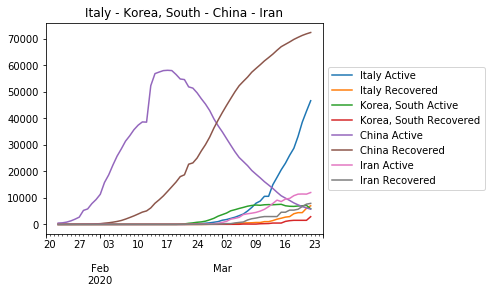

In [1429]:
plotCountriesTotal(None, None, df_active, df_recovered, ["Italy", "Korea, South", "China", "Iran"])

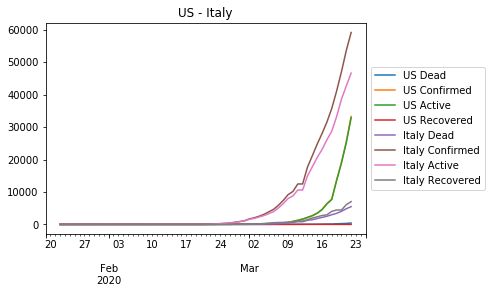

In [1430]:
plotCountriesTotal(df_dead, df_confirmed, df_active, df_recovered, ["US", "Italy"])

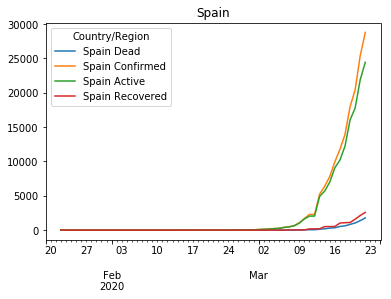

In [1431]:
plotCountryTotal(df_dead, df_confirmed, df_active, df_recovered, "Spain")

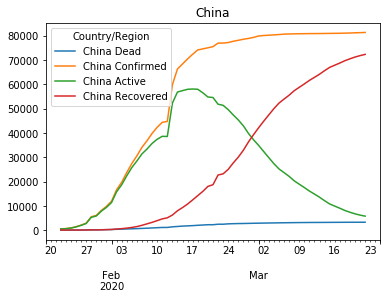

In [1432]:
plotCountryTotal(df_dead, df_confirmed, df_active, df_recovered, "China")

In [1433]:
# https://link.springer.com/article/10.1007/s00134-012-2627-8/tables/2
ICUBeds = {
    "US": 34.2,
    "Germany": 29.2,
    "Italy": 12.5,
    "France": 11.6,
    "Korea, South": 10.6,
    "Spain": 9.7,
    "Japan": 7.3,
    "United Kingdom": 6.6,
    "China": 3.6,
    "India": 2.3,
    "Iran": 7.29,
    "Switzerland": 11.0,
    "Netherlands": 6.4,
    "Norway": 8.0,
    "Sweden": 5.8,
    "Belgium": 15.9,
    "Austria": 21.8,
    "Denmark": 6.7,
    "Andorra": 7.1,
    "Bulgaria": 12.2,
    
}
icuBeds = pd.DataFrame(data=[ICUBeds]).T.rename(columns={0:'ICU Beds Per 100k'})

In [1434]:
todayDead = df_dead.iloc[[-1]].T.rename(columns={today:"dead"})
todayConfirmed = df_confirmed.iloc[[-1]].T.rename(columns={today:"confirmed"})
todayRecovered = df_recovered.iloc[[-1]].T.rename(columns={today:"recovered"})
df = todayDead.join(todayConfirmed).join(todayRecovered)
df['death_rate'] = (100 * df['dead'] / df['confirmed']).round(2)
df['recover_rate'] = (100 * df['recovered'] / df['confirmed']).round(2)
df = df.join(careBeds.set_index("Country")[["ICU Beds Per 100k"]])

In [1435]:
def scatterPlotICU(df, yaxis):
    toPlot = df.dropna().iloc[:len(colors)]
    toPlot['color'] = colors
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.gca()
    ax.scatter(toPlot[yaxis],toPlot['ICU Beds Per 100k'],c=toPlot["color"],alpha=0.4)
    ax.set_xlabel(yaxis)
    ax.set_ylabel("ICU Beds Per 100k")

    col_dict = toPlot[['color']].to_dict()['color']

    #retrieve values from color dictionary and attribute it to corresponding labels
    leg_el = [
        mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) 
        for key, value in col_dict.items()
    ]
    lgd = ax.legend(handles = leg_el)
    plt.title("ICU Beds Versus " + yaxis)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    plt.tight_layout()
    plt.savefig("icu."+yaxis+".png", bbox_extra_artists=(lgd,), bbox_inches='tight')

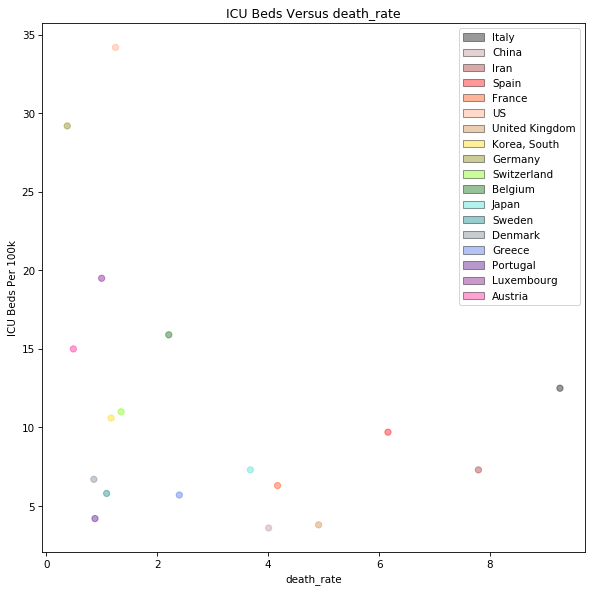

In [1436]:
scatterPlotICU(df, "death_rate")

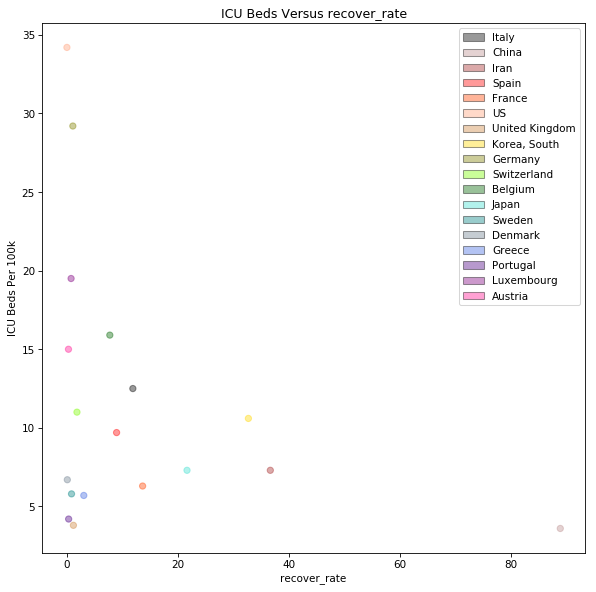

In [1437]:
scatterPlotICU(df, "recover_rate")